# Question 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('data/records-of-hdb-flat-resale-transactions-closed-by-salespersons.csv')

In [73]:
df.columns

Index(['complete_date_txt', 'town_txt', 'represented', 'salesperson_name',
       'salesperson_reg_no'],
      dtype='object')

## Task 1

Based on the dataset, how many sales would you expect an agent to close each year? How
much variation is there among agents?

In [74]:
# Split date to year and month columns

df['year'] = df['complete_date_txt'].apply(lambda x: x.split(' ')[1])
df['month'] = df['complete_date_txt'].apply(lambda x: x.split(' ')[0])

In [75]:
# Create summary dataframe of number of unique salesperson each year and total sales for each year

sales_count_year =  df.groupby('year').agg({
    'salesperson_reg_no': {
        'n_salesperson' : lambda x: x.nunique(),
        'sales_count' : 'count'
    },
})

sales_count_year = sales_count_year.droplevel(0, axis=1)

In [76]:
sales_count_year

n_salesperson  sales_count
year                            
2017           8415        30604
2018           9006        35364
2019           7891        28195

In [77]:
# Get average number of sales per agent each year

sales_count_year['average_sales_per_salesperson'] = sales_count_year['sales_count'] / sales_count_year['n_salesperson']

In [78]:
sales_count_year['average_sales_per_salesperson']

year
2017    3.636839
2018    3.926716
2019    3.573058
Name: average_sales_per_salesperson, dtype: float64

Therefore, an agent can be expected to close  3.636839, 3.926716, and 3.573058 sales each year for the years 2017, 2018, 2019 respectively

### Variation among agents by year

In [79]:
agent_2017_sales = df.loc[df['year'] == '2017'].groupby('salesperson_reg_no').agg('count')['complete_date_txt'].values
agent_2018_sales = df.loc[df['year'] == '2018'].groupby('salesperson_reg_no').agg('count')['complete_date_txt'].values
agent_2019_sales = df.loc[df['year'] == '2019'].groupby('salesperson_reg_no').agg('count')['complete_date_txt'].values

In [80]:
# Print out variances and ranges for agent sales each year

print(f"""
    Agent Sales in 2017
    Number of Agents: {len(agent_2017_sales)}
    Min: {min(agent_2017_sales)}
    Max: {max(agent_2017_sales)}
    Median: {np.median(agent_2017_sales)}
    Mean: {np.mean(agent_2017_sales)}
    Variance: {np.var(agent_2017_sales)}

""")

print(f"""
    Agent Sales in 2018
    Number of Agents: {len(agent_2018_sales)}
    Min: {min(agent_2018_sales)}
    Max: {max(agent_2018_sales)}
    Median: {np.median(agent_2018_sales)}
    Mean: {np.mean(agent_2018_sales)}
    Variance: {np.var(agent_2018_sales)}

""")

print(f"""
    Agent Sales in 2019
    Number of Agents: {len(agent_2019_sales)}
    Min: {min(agent_2019_sales)}
    Max: {max(agent_2019_sales)}
    Median: {np.median(agent_2019_sales)}
    Mean: {np.mean(agent_2019_sales)}
    Variance: {np.var(agent_2019_sales)}

""")


    Agent Sales in 2017
    Number of Agents: 8415
    Min: 1
    Max: 214
    Median: 2.0
    Mean: 3.6368389780154486
    Variance: 35.5831467518497



    Agent Sales in 2018
    Number of Agents: 9006
    Min: 1
    Max: 254
    Median: 2.0
    Mean: 3.926715522984677
    Variance: 49.154522789825656



    Agent Sales in 2019
    Number of Agents: 7891
    Min: 1
    Max: 198
    Median: 2.0
    Mean: 3.573057914079331
    Variance: 37.654876709229924




## Task 2

Examine the distribution for number of sales closed by an agent in a year & suggest a
probability distribution that may be suitable for modelling this set of values. What are some ways in
which your suggested distribution is appropriate? What are some of its limitations?

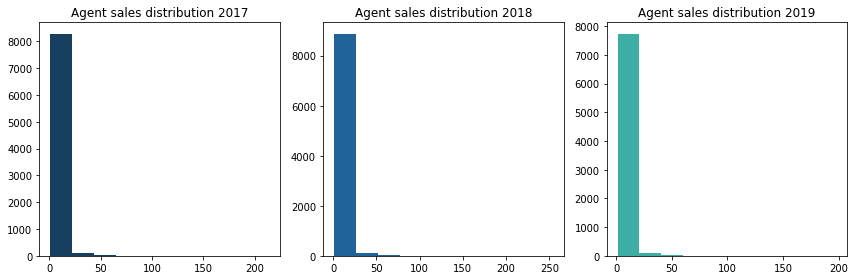

In [81]:
# Visualize distribution of agent sales each year

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,4))

ax1.hist(agent_2017_sales, color='#173f5f')
ax1.set_title('Agent sales distribution 2017')

ax2.hist(agent_2018_sales, color='#20639b')
ax2.set_title('Agent sales distribution 2018')

ax3.hist(agent_2019_sales, color='#3Caea3')
ax3.set_title('Agent sales distribution 2019')

plt.tight_layout()

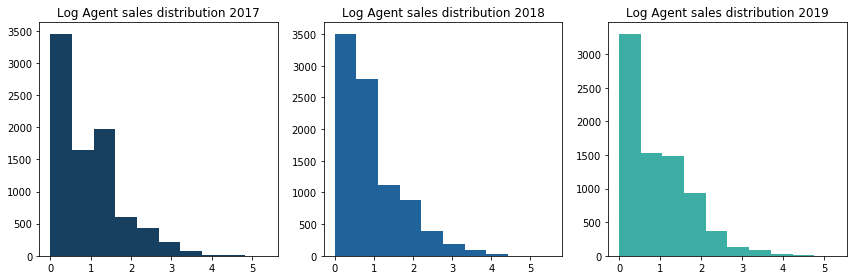

In [82]:
# Visualize distribution of agent sales each year - log transformed

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,4))

ax1.hist(np.log(agent_2017_sales), color='#173f5f')
ax1.set_title('Log Agent sales distribution 2017')

ax2.hist(np.log(agent_2018_sales), color='#20639b')
ax2.set_title('Log Agent sales distribution 2018')

ax3.hist(np.log(agent_2019_sales), color='#3Caea3')
ax3.set_title('Log Agent sales distribution 2019')

plt.tight_layout()

A Poisson distribution would be appropriate for modelling this distribution.
This is appropriate as Poisson is well suited to handle skewed datasets as shown in the plots above. In such caes, a normal distribution will not be appropriate.
The conditions for using Poisson are also favourable as the data is non-negative and represents counts (sales) over a fixed period (year).


One disadvantage of using Poisson is that it implicitly assumes that the variance equals to the mean. However, this does not seem to be the case from our calculated statistics above. However, this could be due to outliers or variation in the sample variance. 

## Task 3

Property agents tend to specialise in one or more specific geographical areas, rather than ply
their trade equally island-wide. Given a property agent who has closed sales in Sembawang and
Yishun during a given year, which other town is he/she most likely to be active in that year?

In [83]:
# We want to filter out agents that have plied both Sembawang and Yishun
# Concatenate town dummies to dataframe

towns = list(df['town_txt'].value_counts().index)
df = pd.concat([df, pd.get_dummies(df['town_txt'])], axis=1)

## 2019

In [84]:
df_2019

complete_date_txt         town_txt represented  \
65968      January 2019           BISHAN       Buyer   
65969      January 2019       ANG MO KIO       Buyer   
65970      January 2019         TAMPINES       Buyer   
65971      January 2019  KALLANG/WHAMPOA       Buyer   
65972      January 2019      BUKIT BATOK       Buyer   
...                 ...              ...         ...   
94158     December 2019       QUEENSTOWN      Seller   
94159     December 2019       ANG MO KIO      Seller   
94160     December 2019          PUNGGOL      Seller   
94161     December 2019          PUNGGOL      Seller   
94162     December 2019           YISHUN      Seller   

                 salesperson_name salesperson_reg_no  year     month  \
65968        CHAN WEIREN, MICHAEL           R047642D  2019   January   
65969  TAN HAN BOON (CHEN HANWEN)           R044833A  2019   January   
65970          JOYCE LEE SIEOK QI           R052349Z  2019   January   
65971   TAY TAT MUN (ZHENG DAWEN)           R045367Z  2019   January   
65972      NUR AZHAR BIN SULAIMAN           R050224G  2019   January   
...                           ...                ...   ...       ...   
94158          VICTOR HU JIA RONG           R027676Z  2019  December   
94159                 CHAN EUGENE           R031577C  2019  December   
94160   LAU KAR LOON (LIU JIALUN)           R050678A  2019  December   
94161        WONG WEI JIE, EDMUND           R060948C  2019  December   
94162      TAN HWEE SHUANG ZOLINE           R057811A  2019  December   

       ANG MO KIO  BEDOK  BISHAN  ...  PASIR RIS  PUNGGOL  QUEENSTOWN  \
65968           0      0       1  ...          0        0           0   
65969           1      0       0  ...          0        0           0   
65970           0      0       0  ...          0        0           0   
65971           0      0       0  ...          0        0           0   
65972           0      0       0  ...          0        0           0   
...           ...    ...     ...  ...        ...      ...         ...   
94158           0      0       0  ...          0        0           1   
94159           1      0       0  ...          0        0           0   
94160           0      0       0  ...          0        1           0   
94161           0      0       0  ...          0        1           0   
94162           0      0       0  ...          0        0           0   

       SEMBAWANG  SENGKANG  SERANGOON  TAMPINES  TOA PAYOH  WOODLANDS  YISHUN  
65968          0         0          0         0          0          0       0  
65969          0         0          0         0          0          0       0  
65970          0         0          0         1          0          0       0  
65971          0         0          0         0          0          0       0  
65972          0         0          0         0          0          0       0  
...          ...       ...        ...       ...        ...        ...     ...  
94158          0         0          0         0          0          0       0  
94159          0         0          0         0          0          0       0  
94160          0         0          0         0          0          0       0  
94161          0         0          0         0          0          0       0  
94162          0         0          0         0          0          0       1  

[28195 rows x 85 columns]

In [85]:
# Restrict to 2019

df_2019 = df.loc[df['year'] == "2019"]

In [86]:
# Group by agents with sum of sales of each town

agent_town_sales = df_2019[['salesperson_reg_no'] + towns].groupby('salesperson_reg_no').agg(sum)

In [90]:
# Filter out agents that have both sales in Sembawang and Yishun
# And sum up the rows

agent_town_sales.loc[(agent_town_sales['SEMBAWANG']> 0) & (agent_town_sales['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

YISHUN         686
WOODLANDS      558
SEMBAWANG      389
SENGKANG       306
JURONG WEST    277
dtype: int64

For the year 2019, for the agent group that have made sales in both Yishun and Sembawang, the next most common town that a sale would occur is in Woodlands

In [91]:
# DF of 1 if agent was present in town, 0 if not

agent_town_presence = agent_town_sales.apply(lambda x: (x > 0).astype(np.uint8))

In [92]:
agent_town_presence.loc[(agent_town_presence['SEMBAWANG']> 0) & (agent_town_presence['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

SEMBAWANG      225
YISHUN         225
WOODLANDS      139
SENGKANG       101
JURONG WEST    101
dtype: int64

For the year 2019, for agents that have made sales in both Yishun and Sembawang, agents are most likely to also have at least one sale in Woodlands

## 2018

Repeat above 2019 method for the rest of the years

In [93]:
# Restrict to 2018

df_2018 = df.loc[df['year'] == "2018"]

In [94]:
# Group by agents with sum of sales of each town

agent_town_sales = df_2018[['salesperson_reg_no'] + towns].groupby('salesperson_reg_no').agg(sum)

In [95]:
# Filter out agents that have both sales in Sembawang and Yishun
# And sum up the rows

agent_town_sales.loc[(agent_town_sales['SEMBAWANG']> 0) & (agent_town_sales['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

YISHUN       685
WOODLANDS    581
SEMBAWANG    408
PUNGGOL      306
SENGKANG     305
dtype: int64

In [96]:
# DF of 1 if agent was present in town, 0 if not

agent_town_presence = agent_town_sales.apply(lambda x: (x > 0).astype(np.uint8))
agent_town_presence.loc[(agent_town_presence['SEMBAWANG']> 0) & (agent_town_presence['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

YISHUN         224
SEMBAWANG      224
WOODLANDS      136
JURONG WEST    106
SENGKANG       105
dtype: int64

Similarly for the year 2018, for agents that have made sales in both Yishun and Sembawang, agents are most likely to also have at least one sale in Woodlands

## 2017

In [97]:
# Restrict to 2017

df_2017 = df.loc[df['year'] == "2017"]

In [98]:
# Group by agents with sum of sales of each town

agent_town_sales = df_2017[['salesperson_reg_no'] + towns].groupby('salesperson_reg_no').agg(sum)

In [99]:
# Filter out agents that have both sales in Sembawang and Yishun
# And sum up the rows

agent_town_sales.loc[(agent_town_sales['SEMBAWANG']> 0) & (agent_town_sales['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

YISHUN         589
WOODLANDS      372
SEMBAWANG      317
JURONG WEST    193
SENGKANG       186
dtype: int64

In [100]:
# DF of 1 if agent was present in town, 0 if not

agent_town_presence = agent_town_sales.apply(lambda x: (x > 0).astype(np.uint8))
agent_town_presence.loc[(agent_town_presence['SEMBAWANG']> 0) & (agent_town_presence['YISHUN']> 0)] \
    .sum() \
    .sort_values(ascending=False).head(5)

YISHUN         177
SEMBAWANG      177
WOODLANDS      108
SENGKANG        71
JURONG WEST     67
dtype: int64

Similarly for the year 2017, for agents that have made sales in both Yishun and Sembawang, agents are most likely to also have at least one sale in Woodlands